# Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1: Personal Finance Planner: Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()

# Fetch current ETH price
eth_price = requests.get(eth_url).json()

# Compute current value of my crpto
btc_value = btc_price['data']['1']['quotes']['USD']['price']
eth_value = eth_price['data']['1027']['quotes']['USD']['price']
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${round(my_btc*btc_value, 2)}")
print(f"The current value of your {my_eth} ETH is ${round(my_eth*eth_value, 2)}")

The current value of your 1.2 BTC is $49579.2
The current value of your 5.3 ETH is $16498.85


## Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('APCA-API-KEY-ID')
alpaca_secret_key = os.getenv('APCA-API-SECRET-KEY')
type(alpaca_api_key)

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key, api_version = 'v2')

In [10]:
# Format current date as ISO format
today = pd.Timestamp('2022-04-13', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(tickers, timeframe, start = today ,end = today).df

# Reorganize the DataFrame
# Separate ticker data
agg = df_investments[df_investments['symbol']=='AGG']
spy = df_investments[df_investments['symbol']=='SPY']


# Concatenate the ticker DataFrames
df_investments = pd.concat([agg,spy], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_investments.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-04-13 04:00:00+00:00  104.77  105.09  104.74  104.82  6868550   

                                                             SPY          \
                          trade_count        vwap symbol    open    high   
timestamp                                                                  
2022-04-13 04:00:00+00:00       27348  104.889799    AGG  437.96  444.11   

                                                                             \
                              low   close    volume trade_count        vwap   
timestamp                                                                     
2022-04-13 04:00:00+00:00  437.84  443.31  73734315      563285  441.262058   

                                  
                          symbol  
timestamp                         
2022-04-13 04:00:00+00:00    SPY

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments['AGG']['close'])
spy_close_price = float(df_investments['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $104.82
Current SPY closing price: $443.31


In [12]:
# Compute the current value of shares

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy * agg_close_price}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg * spy_close_price}")

The current value of your 50 SPY shares is $5241.0
The current value of your 200 AGG shares is $88662.0


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc*btc_value + my_eth*eth_value
shares = my_spy * agg_close_price + my_agg * spy_close_price

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [crypto, shares]},['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,66078.047
shares,93903.000


<AxesSubplot:title={'center':'My investments'}, ylabel='amount'>

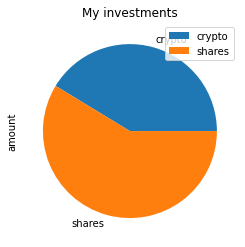

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='My investments')

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings.sum()

# Validate saving health
if int(savings) > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif int(savings) == emergency_fund:
    print(f"Congratulations! You have reached your financial goal.")
else:
    print(f"You are {emergency_fund - int(savings)} dollars away the person is from reaching your financial goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 : Retirement Planning using Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
today = pd.Timestamp('2022-04-13', tz='America/New_York').isoformat()
start = pd.Timestamp('2017-04-13', tz='America/New_York').isoformat()



stock_data = alpaca.get_bars(tickers, timeframe, start = start ,end = today).df

# Reorganize the DataFrame
# Separate ticker data
agg_stock = stock_data[stock_data['symbol']=='AGG']
spy_stock = stock_data[stock_data['symbol']=='SPY']


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_stock, spy_stock], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-04-13 04:00:00+00:00  109.25  109.39  109.13  109.27  2339939   
2017-04-17 04:00:00+00:00  109.30  109.40  109.18  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.70  109.39  109.65  2369862   
2017-04-19 04:00:00+00:00  109.47  109.56  109.39  109.48  2148531   
2017-04-20 04:00:00+00:00  109.31  109.40  109.20  109.31  1867805   

                                                             SPY           \
                          trade_count        vwap symbol    open     high   
timestamp                                                                   
2017-04-13 04:00:00+00:00       13465  109.262713    AGG  233.65  234.490   
2017-04-17 04:00:00+00:00        7973  109.294030    AGG  233.12  234.570   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG  233.71  234.490   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG  234.52  234.950   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG  234.14  235.845   

                                                                             \
                              low   close    volume trade_count        vwap   
timestamp                                                                     
2017-04-13 04:00:00+00:00  232.51  232.51  92880394      303955  233.364725   
2017-04-17 04:00:00+00:00  232.88  234.57  68405367      213643  233.870859   
2017-04-18 04:00:00+00:00  233.08  233.87  83225836      245279  233.958942   
2017-04-19 04:00:00+00:00  233.18  233.44  68699868      248643  233.953779   
2017-04-20 04:00:00+00:00  233.78  235.34  92572186      279885  234.978432   

                                  
                          symbol  
timestamp                         
2017-04-13 04:00:00+00:00    SPY  
2017-04-17 04:00:00+00:00    SPY  
2017-04-18 04:00:00+00:00    SPY  
2017-04-19 04:00:00+00:00    SPY  
2017-04-20 04:00:00+00:00    SPY

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation (portfolio_data = df_stock_data, 
                           weights = (0.4,0.6),
                           num_simulation= 500,
                           num_trading_days=252*30)

In [19]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-04-13 04:00:00+00:00  109.25  109.39  109.13  109.27  2339939   
2017-04-17 04:00:00+00:00  109.30  109.40  109.18  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.70  109.39  109.65  2369862   
2017-04-19 04:00:00+00:00  109.47  109.56  109.39  109.48  2148531   
2017-04-20 04:00:00+00:00  109.31  109.40  109.20  109.31  1867805   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-04-13 04:00:00+00:00       13465  109.262713    AGG          NaN  233.65   
2017-04-17 04:00:00+00:00        7973  109.294030    AGG    -0.000549  233.12   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG     0.004029  233.71   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG    -0.001550  234.52   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG    -0.001553  234.14   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2017-04-13 04:00:00+00:00  234.490  232.51  232.51  92880394      303955   
2017-04-17 04:00:00+00:00  234.570  232.88  234.57  68405367      213643   
2017-04-18 04:00:00+00:00  234.490  233.08  233.87  83225836      245279   
2017-04-19 04:00:00+00:00  234.950  233.18  233.44  68699868      248643   
2017-04-20 04:00:00+00:00  235.845  233.78  235.34  92572186      279885   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-04-13 04:00:00+00:00  233.364725    SPY          NaN  
2017-04-17 04:00:00+00:00  233.870859    SPY     0.008860  
2017-04-18 04:00:00+00:00  233.958942    SPY    -0.002984  
2017-04-19 04:00:00+00:00  233.953779    SPY    -0.001839  
2017-04-20 04:00:00+00:00  234.978432    SPY     0.008139

In [20]:
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000687,1.009884,0.987841,0.987483,1.011602,1.004834,0.986988,0.997861,1.006278,1.003316,...,0.989165,0.996932,0.997934,0.996621,0.996813,1.001147,1.000071,1.012091,1.005535,0.995838
2,0.994754,1.004152,0.983386,0.972638,1.011652,1.005816,0.986170,0.987735,1.016368,1.004710,...,0.993804,0.992987,0.994931,0.994447,0.986905,1.002911,1.005665,1.013917,1.008050,1.007379
3,0.997213,1.024457,0.998329,0.959998,1.018845,1.003475,0.981506,0.999484,1.027978,0.999301,...,0.992930,0.997631,0.992421,0.995866,0.979752,1.007303,1.007964,1.019255,1.004697,1.006367
4,1.006214,1.021994,0.988925,0.953870,1.017255,0.997122,0.976837,1.002447,1.022040,1.016279,...,1.005769,1.005317,0.994596,0.993993,0.981811,1.009264,1.008846,1.012832,1.005393,1.003848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.915240,32.130293,4.960322,15.108711,14.582455,14.376885,24.662193,22.410649,19.195054,10.132458,...,27.183557,4.099144,7.843654,4.407295,12.250771,16.668122,13.026126,11.322517,6.958361,5.101355
7557,3.931076,32.311916,4.905798,15.103656,14.559751,14.218290,24.943224,22.523739,19.233855,10.070252,...,26.866766,4.068107,7.763997,4.440321,12.330496,16.782229,13.127209,11.135458,6.874945,5.096696
7558,3.934284,31.977618,4.872982,14.858989,14.639006,14.210569,24.942227,22.490045,19.103908,10.054008,...,26.894760,4.085086,7.630042,4.423463,12.181309,16.745430,13.137321,11.088331,6.851923,5.138949
7559,3.915335,32.017764,4.871924,14.974323,14.554414,14.322127,24.848915,22.487664,18.914897,10.097786,...,26.676562,4.056008,7.669248,4.438158,12.412605,16.577557,12.962255,11.104674,6.820385,5.150375


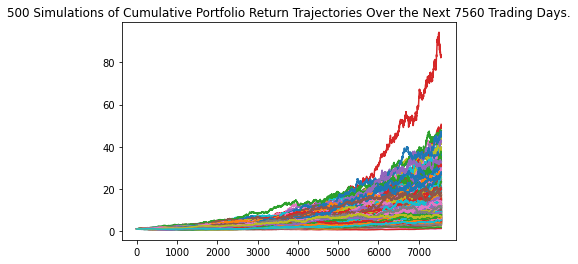

In [21]:
# Plot simulation outcomes
MC_30years_line_plot = MC_30years.plot_simulation()

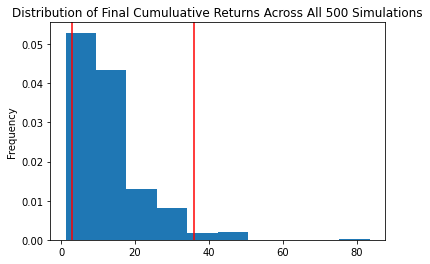

In [22]:
# Plot probability distribution and confidence intervals
dist_MC_30years = MC_30years.plot_distribution()

## Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             12.910036
std               9.307067
min               1.197062
25%               6.591645
50%              10.624987
75%              15.953123
max              83.555860
95% CI Lower      3.059513
95% CI Upper     35.862961
Name: 7560, dtype: float64


## Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[-2]*initial_investment,2)
ci_upper = round(tbl[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio over the next 30 years will end within in the range of ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61190.27 and $717259.23


## Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[-2]*initial_investment,2)
ci_upper = round(tbl[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $91785.4 and $1075888.84


## Optional Challenge : Early Retirement Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five = MCSimulation (portfolio_data = df_stock_data, 
                           weights = (0.4,0.6),
                           num_simulation= 500,
                           num_trading_days=252*5)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-04-13 04:00:00+00:00  109.25  109.39  109.13  109.27  2339939   
2017-04-17 04:00:00+00:00  109.30  109.40  109.18  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.70  109.39  109.65  2369862   
2017-04-19 04:00:00+00:00  109.47  109.56  109.39  109.48  2148531   
2017-04-20 04:00:00+00:00  109.31  109.40  109.20  109.31  1867805   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-04-13 04:00:00+00:00       13465  109.262713    AGG          NaN  233.65   
2017-04-17 04:00:00+00:00        7973  109.294030    AGG    -0.000549  233.12   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG     0.004029  233.71   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG    -0.001550  234.52   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG    -0.001553  234.14   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2017-04-13 04:00:00+00:00  234.490  232.51  232.51  92880394      303955   
2017-04-17 04:00:00+00:00  234.570  232.88  234.57  68405367      213643   
2017-04-18 04:00:00+00:00  234.490  233.08  233.87  83225836      245279   
2017-04-19 04:00:00+00:00  234.950  233.18  233.44  68699868      248643   
2017-04-20 04:00:00+00:00  235.845  233.78  235.34  92572186      279885   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-04-13 04:00:00+00:00  233.364725    SPY          NaN  
2017-04-17 04:00:00+00:00  233.870859    SPY     0.008860  
2017-04-18 04:00:00+00:00  233.958942    SPY    -0.002984  
2017-04-19 04:00:00+00:00  233.953779    SPY    -0.001839  
2017-04-20 04:00:00+00:00  234.978432    SPY     0.008139

In [28]:
# Plot simulation outcomes
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012403,1.002968,0.988593,0.990361,1.001229,0.996584,1.005434,1.007076,1.004620,1.006335,...,0.990677,0.988266,1.012566,0.994977,0.992224,0.983129,0.988486,1.008663,1.009469,1.007506
2,1.024375,1.009160,0.990097,0.999543,0.998898,1.006465,1.002230,1.015450,1.010413,0.999144,...,0.988155,0.975354,1.012565,0.997240,0.998082,0.979777,0.998385,1.017610,1.008245,1.004607
3,1.026942,0.996823,0.986278,0.996571,1.003105,1.006172,1.006437,1.011423,1.014748,0.993157,...,0.991022,0.975548,1.018988,0.985872,1.007936,0.974633,1.006146,1.015142,1.018479,0.999172
4,1.028994,0.992186,0.991185,0.983800,1.006627,1.026073,1.016409,1.014876,1.020376,0.994921,...,0.990962,0.958896,1.020542,0.986561,1.016028,0.984103,1.002475,1.011186,1.017201,0.997186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.682702,1.540032,1.199663,1.292334,1.431345,1.588111,1.811164,1.891011,3.175804,1.772287,...,1.365631,1.830581,0.893429,2.393948,1.253058,1.524614,1.454281,1.980471,1.253471,1.421479
1257,1.679679,1.542682,1.195472,1.286924,1.437056,1.597319,1.806547,1.905130,3.180419,1.789155,...,1.355005,1.841891,0.895593,2.437688,1.254959,1.520382,1.433460,1.969494,1.250189,1.423257
1258,1.664007,1.534396,1.199273,1.299366,1.425755,1.606522,1.792917,1.884581,3.173985,1.787265,...,1.357432,1.835635,0.887027,2.425001,1.246282,1.505987,1.439699,1.991492,1.247553,1.420333
1259,1.668510,1.547133,1.195364,1.308854,1.416109,1.596118,1.798336,1.862801,3.210217,1.776661,...,1.357072,1.818877,0.879989,2.451459,1.233669,1.484629,1.451943,1.980749,1.251278,1.424423


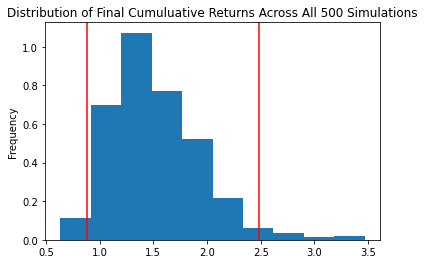

In [29]:
# Plot probability distribution and confidence intervals
dist_MC_five = MC_five.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.521428
std               0.422489
min               0.634951
25%               1.223918
50%               1.449154
75%               1.763347
max               3.467147
95% CI Lower      0.887134
95% CI Upper      2.485505
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[-2]*initial_investment_five,2)
ci_upper_five = round(tbl_five[-1]*initial_investment_five,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53228.02 and $149130.28


## Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation (portfolio_data = df_stock_data, 
                           weights = (0.4,0.6),
                           num_simulation= 500,
                           num_trading_days=252*10)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-04-13 04:00:00+00:00  109.25  109.39  109.13  109.27  2339939   
2017-04-17 04:00:00+00:00  109.30  109.40  109.18  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.70  109.39  109.65  2369862   
2017-04-19 04:00:00+00:00  109.47  109.56  109.39  109.48  2148531   
2017-04-20 04:00:00+00:00  109.31  109.40  109.20  109.31  1867805   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-04-13 04:00:00+00:00       13465  109.262713    AGG          NaN  233.65   
2017-04-17 04:00:00+00:00        7973  109.294030    AGG    -0.000549  233.12   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG     0.004029  233.71   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG    -0.001550  234.52   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG    -0.001553  234.14   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2017-04-13 04:00:00+00:00  234.490  232.51  232.51  92880394      303955   
2017-04-17 04:00:00+00:00  234.570  232.88  234.57  68405367      213643   
2017-04-18 04:00:00+00:00  234.490  233.08  233.87  83225836      245279   
2017-04-19 04:00:00+00:00  234.950  233.18  233.44  68699868      248643   
2017-04-20 04:00:00+00:00  235.845  233.78  235.34  92572186      279885   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-04-13 04:00:00+00:00  233.364725    SPY          NaN  
2017-04-17 04:00:00+00:00  233.870859    SPY     0.008860  
2017-04-18 04:00:00+00:00  233.958942    SPY    -0.002984  
2017-04-19 04:00:00+00:00  233.953779    SPY    -0.001839  
2017-04-20 04:00:00+00:00  234.978432    SPY     0.008139

In [34]:
# Plot simulation outcomes
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992064,1.009467,0.991655,1.007291,0.994291,0.992254,1.004145,1.004191,1.013592,1.002986,...,0.995646,1.011719,0.984901,1.011343,0.997670,1.002038,1.011305,0.999230,1.009604,1.008478
2,0.997030,1.005373,0.999324,1.015774,1.017078,0.988903,1.012405,1.006635,1.016580,1.001378,...,0.997588,1.004669,0.980521,1.009587,0.993858,0.993266,1.005326,1.013057,1.008414,1.011781
3,0.994500,1.013378,0.996812,1.018706,1.032835,0.999624,1.011516,1.005171,1.018903,0.993720,...,1.004005,1.015455,0.982922,1.002054,1.012624,1.001248,1.002070,1.018477,1.007433,1.012088
4,0.987050,1.011134,0.989512,1.020127,1.036324,0.991350,1.008028,0.999638,1.021930,0.981820,...,0.997903,1.024241,0.975400,0.990442,1.018376,1.005102,1.004494,1.006812,1.016549,1.022348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.113255,1.050443,2.678878,1.782427,1.257292,1.443436,1.787001,3.403119,2.393752,1.894263,...,4.274991,3.523517,3.600394,1.521660,2.854718,4.158514,1.410178,1.839094,1.751559,1.843274
2517,3.118648,1.047249,2.671315,1.789071,1.268069,1.450476,1.782055,3.413238,2.405867,1.898037,...,4.282266,3.573259,3.599016,1.501292,2.869254,4.159203,1.412704,1.856375,1.763361,1.850821
2518,3.119216,1.052990,2.653775,1.785143,1.265010,1.453424,1.808561,3.394731,2.399204,1.893737,...,4.297682,3.532886,3.632202,1.526778,2.835399,4.225033,1.413969,1.853414,1.765182,1.847825
2519,3.118292,1.036076,2.639322,1.792600,1.255427,1.462338,1.791341,3.403361,2.404387,1.893766,...,4.324113,3.520740,3.598561,1.528177,2.833584,4.160159,1.415508,1.832555,1.775673,1.844349


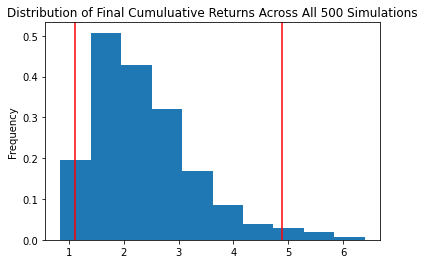

In [35]:
# Plot probability distribution and confidence intervals
dist_MC_ten = MC_ten.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.381324
std               0.950000
min               0.839001
25%               1.706067
50%               2.207190
75%               2.873117
max               6.395395
95% CI Lower      1.113206
95% CI Upper      4.883025
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[-2]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[-1]*initial_investment_ten,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $66792.36 and $292981.49
